In [6]:
import numpy as np
import pandas as pd
from sklearn.utils import resample
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error , accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
# from sklearn.externals.six import StringIO
from IPython.display import Image
from scipy import stats
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR
#import pydotplus

In [34]:
# load dataset
#excel_file = 'Book1.xlsx'
#excel_file = 'OTU level data for Random Forest_final.xlsx'
#excel_file = 'OTU level data for Random Forest_Revised 7_18_19.xlsx'
#excel_file = "OTU level data for Random Forest COMPARTMENT_no_correlated.xlsx"
#excel_file = "OTU level data for Random Forest CROPPING SYSTEM_no_correlated.xlsx"
#excel_file = 'OTU level data for Random Forest_Revised 7_18_19.xlsx'
excel_file = 'OTU level data for Random Forest_Revised 7_18_19_del_AOA-B.xlsx'
#excel_file ='OTU level data for Random Forest COMPARTMENT_no_correlated -delAOA-B.xlsx'
#excel_file = 'OTU level data for Random Forest COMPARTMENT_no_correlated -delAOA-B.xlsx'
data = pd.read_excel(excel_file, sheet_name =3, header=None)
data= data.T
data = pd.DataFrame(data)

data = data.drop(data.columns[0], 1)
# #print(data)
df = data.iloc[1:,:]
df = df.iloc[:-1, :]
#print(feature_train.shape)
#print(response_train.shape)
#print(feature_test.shape)
#print(response_test.shape)
#feature_train.shape
data = df

In [44]:
x = data.iloc[1:,:-1].values
y = data.iloc[1:,-1].values
x=x.astype(float)
y=y.astype(float)
#x=np.array(x)
x=pd.DataFrame(x)
#xm =x.mean(axis =0, keepdims =True)
#xc = x- xm
#print(xm)
#print(xc)
#print(xc.shape)
#m=np.matmul(np.transpose(xc),xc)
#print(LA.eigvals(m/0.067))
#x.corr()
#xm
x

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,0.006105,0.000379,0.001449,0.000138,0.028177,0.000655,0.001897,0.006208,0.001104,0.000414,...,0.000828,0.000414,0.000586,0.000069,0.000138,0.000172,0.000103,0.000552,1.580,25.592
1,0.000934,0.000354,0.007120,0.021876,0.018783,0.000000,0.000741,0.020233,0.002964,0.001224,...,0.000064,0.000193,0.000193,0.000032,0.000129,0.000419,0.000097,0.003157,2.227,34.282
2,0.001549,0.000344,0.008779,0.025949,0.020225,0.000043,0.000559,0.020613,0.003615,0.001162,...,0.000086,0.000215,0.000387,0.000000,0.000172,0.000387,0.000215,0.004260,2.350,36.889
3,0.007677,0.000131,0.000394,0.000066,0.014698,0.004856,0.000919,0.001181,0.000459,0.000066,...,0.000787,0.000328,0.000656,0.000656,0.000000,0.000394,0.000000,0.000131,3.830,65.798
4,0.003146,0.000000,0.000434,0.000000,0.006509,0.001410,0.000000,0.000868,0.000108,0.000000,...,0.001193,0.000325,0.000868,0.000325,0.000000,0.000325,0.000217,0.000108,4.313,65.028
5,0.002162,0.000127,0.012145,0.050868,0.005214,0.000000,0.000064,0.003815,0.002861,0.000382,...,0.000064,0.000318,0.000127,0.000000,0.000382,0.000382,0.000254,0.004324,0.953,53.875
6,0.002006,0.000251,0.007585,0.054601,0.004576,0.000188,0.000125,0.003009,0.002884,0.000313,...,0.000188,0.000752,0.000063,0.000000,0.000251,0.000564,0.000063,0.003260,0.061,38.291
7,0.005659,0.000038,0.001633,0.000228,0.027876,0.000342,0.002089,0.006076,0.000949,0.000342,...,0.000911,0.000646,0.000608,0.000038,0.000000,0.000152,0.000038,0.000532,2.967,55.262
8,0.004372,0.000201,0.001558,0.000352,0.025480,0.000503,0.002111,0.006332,0.000653,0.000352,...,0.001809,0.001005,0.000653,0.000050,0.000050,0.000251,0.000101,0.000804,2.234,30.676
9,0.000913,0.000336,0.006441,0.017161,0.017930,0.000000,0.000721,0.018122,0.002692,0.001202,...,0.000000,0.000336,0.000048,0.000000,0.000433,0.000385,0.000096,0.002500,3.062,45.772


In [45]:
scaler = StandardScaler()

scaler.fit(x)

# Apply transform to both the training set and the test set.
train_img = scaler.transform(x)
train_img

array([[ 1.35584840e+00,  1.59189742e+00, -8.05932953e-01,
        -8.77196075e-01,  1.62574030e+00, -2.62396848e-01,
         1.57648608e+00, -7.13337241e-02, -4.66548766e-01,
        -9.73791717e-02, -3.29957239e-01, -7.73889792e-01,
         1.02044156e+00, -4.89353121e-01, -1.98074358e-01,
        -4.39847125e-03,  9.86535298e-01,  4.67567596e-01,
        -5.67636697e-01,  2.66121883e+00,  1.89437182e+00,
        -2.04786574e-01,  8.69769350e-01,  4.62434010e-01,
         9.75028988e-01,  9.06586392e-01, -1.50006974e-01,
         1.84968607e+00, -2.29131152e-01,  3.94883788e-01,
         1.05496025e-01,  6.27577625e-01, -2.57936974e-01,
        -1.80032620e-01, -9.04226428e-01, -3.81011682e-01,
        -8.27103829e-01, -6.06261800e-01, -1.39158741e+00],
       [-1.18733886e+00,  1.38807911e+00,  4.74462005e-01,
         1.28889655e-01,  5.12527363e-01, -6.78507075e-01,
        -1.82340505e-02,  1.92476514e+00,  1.11396958e+00,
         1.84980691e+00,  1.17451775e+00,  1.73351332e-

In [38]:
# Make an instance of the Model
pca = PCA(0.8)
pca.fit(train_img)


PCA(n_components=0.8)

NameError: name 'a' is not defined

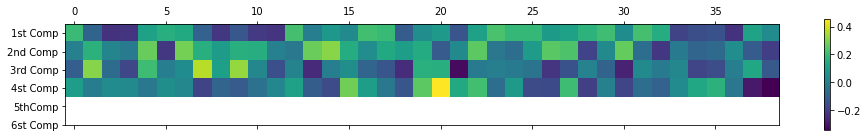

In [39]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2,3,4,5],['1st Comp','2nd Comp','3rd Comp','4st Comp','5thComp','6st Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(a.columns)),a.columns,rotation=90,ha='left')
#plt.tight_layout()
plt.show()# 

In [40]:
from numpy import linalg as LA
def eigenvalue (input_matrix):
    xm = input_matrix.mean(axis = 0)
    xc=input_matrix-xm
    cov = (1/(x.shape[0]-1))*(np.matmul(np.transpose(xc),xc))
    imp = LA.eigvals(cov)
    return imp
    

In [41]:
pca.n_components_

4

In [42]:
E=eigenvalue(train_img)
ind = np.argpartition(E,-30)[-30:]
print(ind[np.argsort(E[ind])])
print(np.argmin(E))
E

[38 37 29 28 36 34 33 35 27 26 25 24 19 18 17 16 15 11 12 10  9  8  7  6
  5  4  3  2  1  0]
14


array([ 1.91748089e+01+0.00000000e+00j,  7.25462916e+00+0.00000000e+00j,
        4.40968492e+00+0.00000000e+00j,  3.00501731e+00+0.00000000e+00j,
        1.82700491e+00+0.00000000e+00j,  1.70943672e+00+0.00000000e+00j,
        1.53516810e+00+0.00000000e+00j,  8.43848576e-01+0.00000000e+00j,
        7.57780334e-01+0.00000000e+00j,  5.66806855e-01+0.00000000e+00j,
        3.77767919e-01+0.00000000e+00j,  2.48843342e-01+0.00000000e+00j,
        2.89202973e-01+0.00000000e+00j, -7.14902248e-16+4.75780835e-16j,
       -7.14902248e-16-4.75780835e-16j,  8.31954910e-16+0.00000000e+00j,
        6.57649611e-16+0.00000000e+00j,  5.37679818e-16+0.00000000e+00j,
        4.46241365e-16+9.74911956e-17j,  4.46241365e-16-9.74911956e-17j,
       -5.21060743e-16+3.29934788e-17j, -5.21060743e-16-3.29934788e-17j,
       -4.73970390e-16+0.00000000e+00j, -4.06563436e-16+0.00000000e+00j,
        4.13719664e-16+0.00000000e+00j,  3.03931924e-16+0.00000000e+00j,
        2.43451599e-16+9.95026376e-17j,  2.43451599

In [43]:
train_img = pca.transform(train_img)
train_img.shape
# eigenvalue(train_img)

(14, 4)

In [16]:
def calc_train_error(X_train, y_train, model):
    '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    mse = mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    return rmse
    
def calc_validation_error(X_test, y_test, model):
    '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return rmse
    
def calc_metrics(X_train, y_train, X_test, y_test, model):
    '''fits model and returns the RMSE for in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [17]:
import statsmodels.api as sm

In [18]:
from sklearn import linear_model

In [48]:
lm = linear_model.LinearRegression()
sv = SVR(kernel='linear', C=1, degree = 1)
tr =  DecisionTreeRegressor(max_features=1, max_depth=2, random_state=20)
rf = RandomForestRegressor(n_estimators=63, max_features=1, max_depth=2, random_state=20)


In [49]:
model = lm.fit(train_img,y)
model2 = sv.fit(train_img,y)
model3 = tr.fit(train_img,y)
model4= rf.fit(train_img,y)

pred_train= model.predict(train_img)
pred_train2= model2.predict(train_img)
pred_train3= model3.predict(train_img)
pred_train4= model4.predict(train_img)


In [50]:
#parameter tuning decision tree
stat_mf =[]
stat_md =[]
for i in range(1,10):    
    # Number of features to consider at every split
    max_features = [int(x) for x in np.linspace(start=1, stop=x.shape[1], num=1)]
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(2, stop =10, num = 1)]
    #max_depth.append(None)

    # Create the random grid
    random_grid = {'max_features': max_features,
                   'max_depth': max_depth
                    }

    # fit model
    tr_random = RandomizedSearchCV(estimator = tr, param_distributions = random_grid, cv=3, random_state=None, n_jobs = 1)
    tr_random.fit(train_img,y)
    stat_mf.append(tr_random.best_estimator_.max_features)
    stat_md.append(tr_random.best_estimator_.max_depth)
    best_random = tr_random.best_estimator_
    # evaluate model
    predictions_train = best_random.predict(train_img)
    score_train = sqrt(mean_squared_error(y, predictions_train))
    print(score_train)
print(np.mean(stat_mf))
print(np.mean(stat_md))

5.1470073282927205
5.1470073282927205
5.1470073282927205
5.1470073282927205
5.1470073282927205
5.1470073282927205
5.1470073282927205
5.1470073282927205
5.1470073282927205
1.0
2.0


C:\Users\famini\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\famini\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\famini\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\famini\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\famini\Anaconda3\lib\site-packages\skle

In [51]:
#parameter tuning random forest
stat_n=[]
stat_mf =[]
stat_md =[]
for i in range(1,10):    
    n_estimators = [int(x) for x in np.linspace(start = 50, stop = 100, num = 100)]
    # Number of features to consider at every split
    max_features = [int(x) for x in np.linspace(start=1, stop=x.shape[1], num=1)]
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(2, stop =10, num = 1)]
    #max_depth.append(None)

    # Create the random grid
    random_grid = {'n_estimators': n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth
                    }


    # fit model
    rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv=3, random_state=None, n_jobs = 1)
    rf_random.fit(train_img,y )
    stat_n.append(rf_random.best_estimator_.n_estimators)
    stat_mf.append(rf_random.best_estimator_.max_features)
    stat_md.append(rf_random.best_estimator_.max_depth)
    best_random = rf_random.best_estimator_
    # evaluate model
    predictions_train = best_random.predict(train_img)
    score_train = sqrt(mean_squared_error(y, predictions_train))
    print(score_train)
print(np.mean(stat_n))
print(np.mean(stat_mf))
print(np.mean(stat_md))

5.065855944543755
5.025714829552343
5.097848790422886
5.007039931653845
5.06899680310517
5.065855944543755
5.097848790422886
5.085561601187083
5.097848790422886
97.77777777777777
1.0
2.0


In [54]:
#parameter tuning SVR
stat_c=[]
stat_degree =[]
for i in range(1,10):    
    # Number of features to consider at every split
    kernel = ['linear']
    C = [int(x) for x in np.linspace(start=1, stop=10, num=1)]
    # Maximum number of levels in tree
    degree = [int(x) for x in np.linspace(start =1, stop =3, num = 1)]
    #max_depth.append(None)

    # Create the random grid
    random_grid = {'C': C,
                   'degree': degree,
                    }

    # fit model
    sv_random = GridSearchCV(estimator = sv, param_distributions = random_grid, cv=3, random_state=None, n_jobs = 1)
    sv_random.fit(train_img, y)
    stat_c.append(sv_random.best_estimator_.C)
    stat_degree.append(sv_random.best_estimator_.degree)
    best_random = sv_random.best_estimator_
    # evaluate model
    predictions_train = best_random.predict(train_img)
    score_train = sqrt(mean_squared_error(y, predictions_train))
    print(score_train)

print(np.mean(stat_c))
print(np.mean(stat_degree))

TypeError: __init__() got an unexpected keyword argument 'param_distributions'

In [204]:
errors1 = abs(pred_train - y)
errors2 = abs(pred_train2 - y)
errors3 = abs(pred_train3- y)
errors4 = abs(pred_train4 - y)

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors1 / y)
mape2 = 100 * (errors2 / y)
mape3 = 100 * (errors3 / y)
mape4 = 100 * (errors4 / y)


# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
accuracy2 = 100 - np.mean(mape2)
accuracy3 = 100 - np.mean(mape3)
accuracy4 = 100 - np.mean(mape4)


print('Accuracy_train_SD_lm:', round(accuracy, 2), '%.')
print('Accuracy_train_SD_SVM:', round(accuracy2, 2), '%.')
print('Accuracy_train_SD_DT:', round(accuracy3, 2), '%.')
print('Accuracy_train_SD_RF:', round(accuracy4, 2), '%.')
#print(lm.score(train_img, y))
print(sqrt(mean_squared_error(y, pred_train)))
print(sqrt(mean_squared_error(y, pred_train2)))
print(sqrt(mean_squared_error(y, pred_train3)))
print(sqrt(mean_squared_error(y, pred_train4)))

Accuracy_train_SD_lm: 69.7 %.
Accuracy_train_SD_SVM: 75.63 %.
Accuracy_train_SD_DT: 75.84 %.
Accuracy_train_SD_RF: 70.95 %.
6.079970254410943
6.422629348729665
5.53402154525435
5.489890206905482


In [205]:
#linear regression-cross validation
from sklearn.model_selection import KFold
for K in range(2,11):
    kf = KFold(n_splits=K, shuffle=True, random_state=42)
    x=np.array(x)
    y=np.array(y)

    validation_errors = []
    for train_index, val_index in kf.split(x,y):

            # split data
            X_train, X_val = x[train_index], x[val_index]
            y_train, y_val = y[train_index], y[val_index]

            #calculate errors
            pca = PCA(0.8)
            scaler.fit(X_train)
            X_train = scaler.transform(X_train)
            X_val = scaler.transform(X_val)
            pca.fit(X_train)
            X_train = pca.transform(X_train)
            X_val = pca.transform(X_val)
            m = lm.fit(X_train, y_train)
            m= sv.fit(X_train, y_train)
            m= tr.fit(X_train, y_train)
            m = rf.fit(X_train, y_train)
            pred_test = m.predict(X_val)
            errors1 = abs(pred_test - y_val)
            # Calculate mean absolute percentage error (MAPE)
            mape = 100 * (errors1 / y_val)


            # Calculate and display accuracy
            accuracy = 100 - np.mean(mape)
            #print('Accuracy_test_RC:', round(accuracy, 2), '%.')
            
            val_error = calc_validation_error(X_val, y_val, m)

            # append to appropriate list
            validation_errors.append(val_error)
            #print(validation_errors)

    print('k ={:7}| mean val error : {:5}'.
          format (K, np.mean(validation_errors)))

k =      2| mean val error : 7.497085342088541
k =      3| mean val error : 7.851677206006418
k =      4| mean val error : 7.654369490696662
k =      5| mean val error : 7.336563253078813
k =      6| mean val error : 7.06372841917808
k =      7| mean val error : 7.1680084374179165
k =      8| mean val error : 6.700544565371025
k =      9| mean val error : 6.64622081955519
k =     10| mean val error : 6.447335737937161


In [206]:
#accuracy test 10 fold cross validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

accuracy_test =[]
accuracy_mean = []
validation_errors = []
val_mean = []
for iteration in range(30):
    for train_index, val_index in kf.split(x,y):
    
    # split data
            X_train, X_val = x[train_index], x[val_index]
            y_train, y_val = y[train_index], y[val_index]

            #calculate errors
            pca = PCA(0.8)
            scaler.fit(X_train)
            X_train = scaler.transform(X_train)
            X_val = scaler.transform(X_val)
            pca.fit(X_train)
            X_train = pca.transform(X_train)
            X_val = pca.transform(X_val)
            m = lm.fit(X_train, y_train)
            #m= sv.fit(X_train, y_train)
            #m= tr.fit(X_train, y_train)
            #m = rf.fit(X_train, y_train)
            pred_test = m.predict(X_val)
            errors1 = abs(pred_test - y_val)
            # Calculate mean absolute percentage error (MAPE)
            mape = 100 * (errors1 / y_val)
            # Calculate and display accuracy
            accuracy = 100 - np.mean(mape)
            accuracy_test.append(accuracy)
            val_error = calc_validation_error(X_val, y_val, m)

            # append to appropriate list
            validation_errors.append(val_error)
            
    accuracy_mean.append(accuracy_test)
    val_mean.append(validation_errors)
    
print(np.mean(accuracy_mean))
print(np.mean(val_mean))

57.443883447755724
7.439296198831198


In [207]:
#accuracy test 10 fold cross validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

accuracy_test =[]
accuracy_mean = []
validation_errors = []
val_mean = []
for iteration in range(30):
    for train_index, val_index in kf.split(x,y):
    
    # split data
            X_train, X_val = x[train_index], x[val_index]
            y_train, y_val = y[train_index], y[val_index]

            #calculate errors
            pca = PCA(0.8)
            scaler.fit(X_train)
            X_train = scaler.transform(X_train)
            X_val = scaler.transform(X_val)
            pca.fit(X_train)
            X_train = pca.transform(X_train)
            X_val = pca.transform(X_val)
            m = lm.fit(X_train, y_train)
            m= sv.fit(X_train, y_train)
            #m= tr.fit(X_train, y_train)
            #m = rf.fit(X_train, y_train)
            pred_test = m.predict(X_val)
            errors1 = abs(pred_test - y_val)
            # Calculate mean absolute percentage error (MAPE)
            mape = 100 * (errors1 / y_val)
            # Calculate and display accuracy
            accuracy = 100 - np.mean(mape)
            accuracy_test.append(accuracy)
            val_error = calc_validation_error(X_val, y_val, m)

            # append to appropriate list
            validation_errors.append(val_error)
            
    accuracy_mean.append(accuracy_test)
    val_mean.append(validation_errors)
    
print(np.mean(accuracy_mean))
print(np.mean(val_mean))

60.5474013195426
7.381800985938063


In [208]:
#accuracy test 10 fold cross validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

accuracy_test =[]
accuracy_mean = []
validation_errors = []
val_mean = []
for iteration in range(30):
    for train_index, val_index in kf.split(x,y):
    
    # split data
            X_train, X_val = x[train_index], x[val_index]
            y_train, y_val = y[train_index], y[val_index]

            #calculate errors
            pca = PCA(0.8)
            scaler.fit(X_train)
            X_train = scaler.transform(X_train)
            X_val = scaler.transform(X_val)
            pca.fit(X_train)
            X_train = pca.transform(X_train)
            X_val = pca.transform(X_val)
            m = lm.fit(X_train, y_train)
            m= sv.fit(X_train, y_train)
            m= tr.fit(X_train, y_train)
            #m = rf.fit(X_train, y_train)
            pred_test = m.predict(X_val)
            errors1 = abs(pred_test - y_val)
            # Calculate mean absolute percentage error (MAPE)
            mape = 100 * (errors1 / y_val)
            # Calculate and display accuracy
            accuracy = 100 - np.mean(mape)
            accuracy_test.append(accuracy)
            val_error = calc_validation_error(X_val, y_val, m)

            # append to appropriate list
            validation_errors.append(val_error)
            
    accuracy_mean.append(accuracy_test)
    val_mean.append(validation_errors)
    
print(np.mean(accuracy_mean))
print(np.mean(val_mean))

70.73334555485391
6.075627131226218


In [209]:
#accuracy test 10 fold cross validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

accuracy_test =[]
accuracy_mean = []
validation_errors = []
val_mean = []
for iteration in range(30):
    for train_index, val_index in kf.split(x,y):
    
    # split data
            X_train, X_val = x[train_index], x[val_index]
            y_train, y_val = y[train_index], y[val_index]

            #calculate errors
            pca = PCA(0.8)
            scaler.fit(X_train)
            X_train = scaler.transform(X_train)
            X_val = scaler.transform(X_val)
            pca.fit(X_train)
            X_train = pca.transform(X_train)
            X_val = pca.transform(X_val)
            m = lm.fit(X_train, y_train)
            m= sv.fit(X_train, y_train)
            m= tr.fit(X_train, y_train)
            m = rf.fit(X_train, y_train)
            pred_test = m.predict(X_val)
            errors1 = abs(pred_test - y_val)
            # Calculate mean absolute percentage error (MAPE)
            mape = 100 * (errors1 / y_val)
            # Calculate and display accuracy
            accuracy = 100 - np.mean(mape)
            accuracy_test.append(accuracy)
            val_error = calc_validation_error(X_val, y_val, m)

            # append to appropriate list
            validation_errors.append(val_error)
            
    accuracy_mean.append(accuracy_test)
    val_mean.append(validation_errors)
    
print(np.mean(accuracy_mean))
print(np.mean(val_mean))

63.169041888930344
6.44733573793716


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

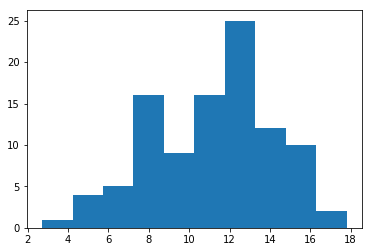

[17.79461734804402, 7.7971456997899065, 13.396710100442192, 13.159214995021959, 6.423217265665737, 12.326000617145588, 12.072960807761214, 17.327215388663802, 7.261482183182672, 14.672787951993442, 11.461825414984244, 7.631034579123653, 8.27569557507477, 12.656793330753208, 13.246204080257986, 11.96876474145695, 14.09785638199915, 12.490338179327045, 11.885854854883064, 6.928449370027058, 7.960638938239469, 8.288908583282264, 15.823497331113845, 8.28378612151879, 15.253886494421026, 11.52514241796418, 10.357284083250661, 12.699003039033062, 11.39396784075737, 11.480892319162246, 14.022116714284321, 11.825900147900999, 9.993395554120866, 9.162085046979374, 9.693630318611783, 8.307816680326264, 14.998494766801354, 14.97716993525186, 13.343853012894801, 9.453052800559957, 8.709899720983822, 5.812813853300946, 5.7705314114635575, 11.280932778768562, 4.658580814072728, 10.794951750811125, 8.044706728998552, 8.300578919764696, 11.545321326085762, 13.935587129700313, 5.308788450001211, 8.5430

In [59]:
#bootstrap for evaluating linear regression
n_iteration = 100
n_size = int(len(df)*0.7)
values = df.values
values.astype(float)
stats = []
accuracy_test =[]
for i in range(n_iteration):
    train = resample(values, n_samples = n_size)
    test = np.array([x for x in values if x.tolist() not in train.tolist()])
    #print("train set:", train.shape)
    #print("test set:",test.shape)
    tr = DecisionTreeRegressor()
    #B = BayesianRidge()
    #model = B.fit(train[:,:-1],train[:,-1])
    #model = lm.fit(train[:,:-1],train[:,-1])
    model = RandomForestRegressor().fit(train[:,:-1],train[:,-1])
    pred_test = model.predict(test[:,:-1])
    #print(test[:,-1])
    #print (pred_test)
    errors1 = abs(pred_test - test[:,-1])
    #print(errors1)
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors1 / test[:,-1])
    #print(mape)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    #print('Accuracy_test_RC:', round(accuracy, 2), '%.')
    accuracy_test.append(accuracy)
    
    #score_train = sqrt(mean_squared_error(train[:,-1], pred_train))
    score_test = sqrt(mean_squared_error(test[:,-1], pred_test))
    #ACC = 0.632*score_train + 0.368*score_test
    stats.append(score_test)
    
plt.hist(stats) 
plt.show()

#confident interval
z = 1.96
xbar = np.mean(stats)
var = np.var(stats)
#print(stats)
lower =  max(0,xbar - (z*var/(sqrt(n_iteration))))
upper =  xbar + (z*var/(sqrt(n_iteration)))
print ('%.1f confidence interval %.1f%% and %.1f%%' % (95, lower,upper))
print(np.mean(stats))
#print(np.mean(accuracy_test))

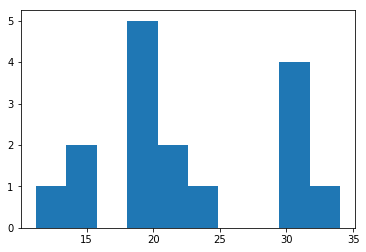

In [36]:
plt.hist(y)
plt.show()

In [11]:
# linear feature selection

df1=np.array(a)
y1=y.reshape(-1,1)
s=np.concatenate((df1,y1) , axis=1)
s = pd.DataFrame(s)
s.corr().iloc[:,-1].sort_values()

12   -0.524188
37   -0.428933
16   -0.422456
38   -0.412172
7    -0.402207
22   -0.395082
8    -0.389898
29   -0.371767
14   -0.331003
17   -0.300845
27   -0.292685
24   -0.273943
39   -0.262376
4    -0.257590
11   -0.222402
28   -0.191854
21   -0.180298
5    -0.137261
33   -0.115864
34   -0.072382
13   -0.069903
26   -0.066147
15   -0.059983
19   -0.039880
9    -0.026713
25    0.009586
36    0.045071
35    0.052388
2     0.072506
30    0.072966
32    0.106197
0     0.152207
40    0.182089
20    0.317188
1     0.353887
3     0.356283
10    0.367523
18    0.415171
31    0.484262
6     0.536639
23    0.649173
41    1.000000
Name: 41, dtype: float64

In [153]:
y = pd.DataFrame(y)
median_pred =y.median()

0    20.159965
dtype: float64